## Bike sharing case study

### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Steps to execute to build multi linear regression model :

#### Step 1: Loading and understanding the data

#### Step 3: Data cleaning

#### Step 4: Data visualisation

#### Step 5: Data preparation

#### Step 6: Splitting the data into training and testing sets

#### Step 7 : Feature scaling

#### Step 8: Model building

#### Step 9: Residual analysis of the train data

#### Step 10: Predictions and evaluation on test set using the final model

## Let's start building the model

## Step 1: Loading and understanding the data

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import scipy.stats as stats
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data using pandas library
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understanding the data

In [4]:
print(bike.shape)
print(bike.info())

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [5]:
# view the summary statistics of numeric columns
bike.describe()
# bike.describe(include=all)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# view the number of rows and columns
bike.shape

(730, 16)

In [7]:
# check for duplicates in dataset
bike.duplicated().sum()

0

In [8]:
# check for null values in dataset
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# to find categorical columns
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

We can consider season, yr, mnth, holiday, weekday, workingday, weathersit as categorical variables and the rest as numerical variables.

## Step 3: Data cleaning

In [10]:
# dropping instant and dteday as they contribute on our analysis
bike.drop(['instant','dteday'], axis=1, inplace=True)

In [11]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


From the data dictionary, values 1,2,3,4 of season implies spring, summer, fall and winter respectively. These numeric values may misindicate some order and misintepret our analysis. We will assign string values to these seasons.

In [12]:
bike.season.replace(to_replace=1, value='spring', inplace=True)
bike.season.replace(to_replace=2, value='summer', inplace=True)
bike.season.replace(to_replace=3, value='fall', inplace=True)
bike.season.replace(to_replace=4, value='winter', inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
bike.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [14]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Month has numerical values 1-12 which may misindicate some order. Replacing its numerical to string values Jan-Dec by creating a function map_month

In [15]:
def map_month(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

In [16]:
bike[['mnth']] = bike[['mnth']].apply(map_month)

In [17]:
bike.mnth.value_counts()

mnth
Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: count, dtype: int64

In [18]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Week has numerical values 0-6 which may again misindicate some order or rank. Replacing its numerical to string values Sun-Mon  by creating a function map_month

In [19]:
def map_week(x):
    return x.map({0: 'Sun', 1: 'Mon',2: 'Tue', 3: 'Wed', 4: 'Thur', 5: 'Fri', 6: 'Sat'})

In [20]:
bike[['weekday']] = bike[['weekday']].apply(map_week)

In [21]:
bike.weekday.value_counts()

weekday
Mon     105
Tue     105
Wed     104
Thur    104
Fri     104
Sat     104
Sun     104
Name: count, dtype: int64

In [22]:
bike.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

From the data dictionary, values 1,2,3 of weathersit implies - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. These numeric values may misindicate some order and misintepret our analysis. We will assign strings 'C', 'M' and 'L' repectively.

In [23]:
bike.loc[(bike['weathersit'] == 1), 'weathersit'] = 'C'
bike.loc[(bike['weathersit'] == 2), 'weathersit'] = 'M'
bike.loc[(bike['weathersit'] == 3), 'weathersit'] = 'L'

In [24]:
bike.weathersit.value_counts()

weathersit
C    463
M    246
L     21
Name: count, dtype: int64

In [25]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,M,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,M,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,C,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thur,1,C,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,C,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


### Step 4: Data visualisation

<Axes: >

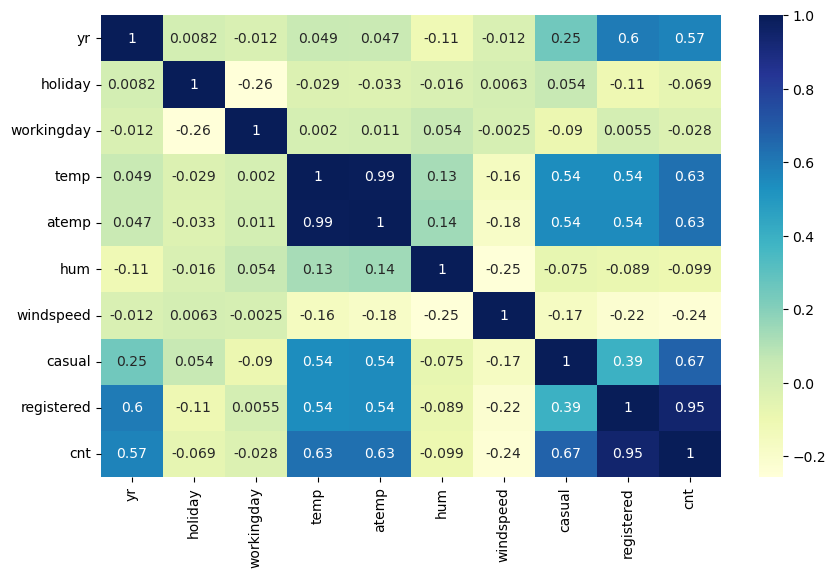

In [27]:
# Understand the correlation between target and predictors
# Understand the mutlicollinearity among various independent variables
plt.figure(figsize=(10,6))
sns.heatmap(bike.select_dtypes(include=np.number).corr(), annot=True, cmap='YlGnBu')

Insights
- Target variable(cnt) is highly positively correlated with registered.
- Target variable(cnt) is positively correlated with casual, temp and atemp
- Target variable(cnt) is negatively correlated with windspeed.This implies with the increase of windspeed, the demand for shared bikes might go down.

In [28]:
# sns.distplot(bike['windspeed'])

In [29]:
# convert casual, registered, cnt as float data type to seggregated them as numeric values

for i in ['casual', 'registered', 'cnt']:
    bike[i] = bike[i].astype('float')

In [30]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    float64
 12  registered  730 non-null    float64
 13  cnt         730 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 80.0+ KB


In [31]:
bike_numeric_var = bike.select_dtypes(include='float')
bike_numeric_var.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


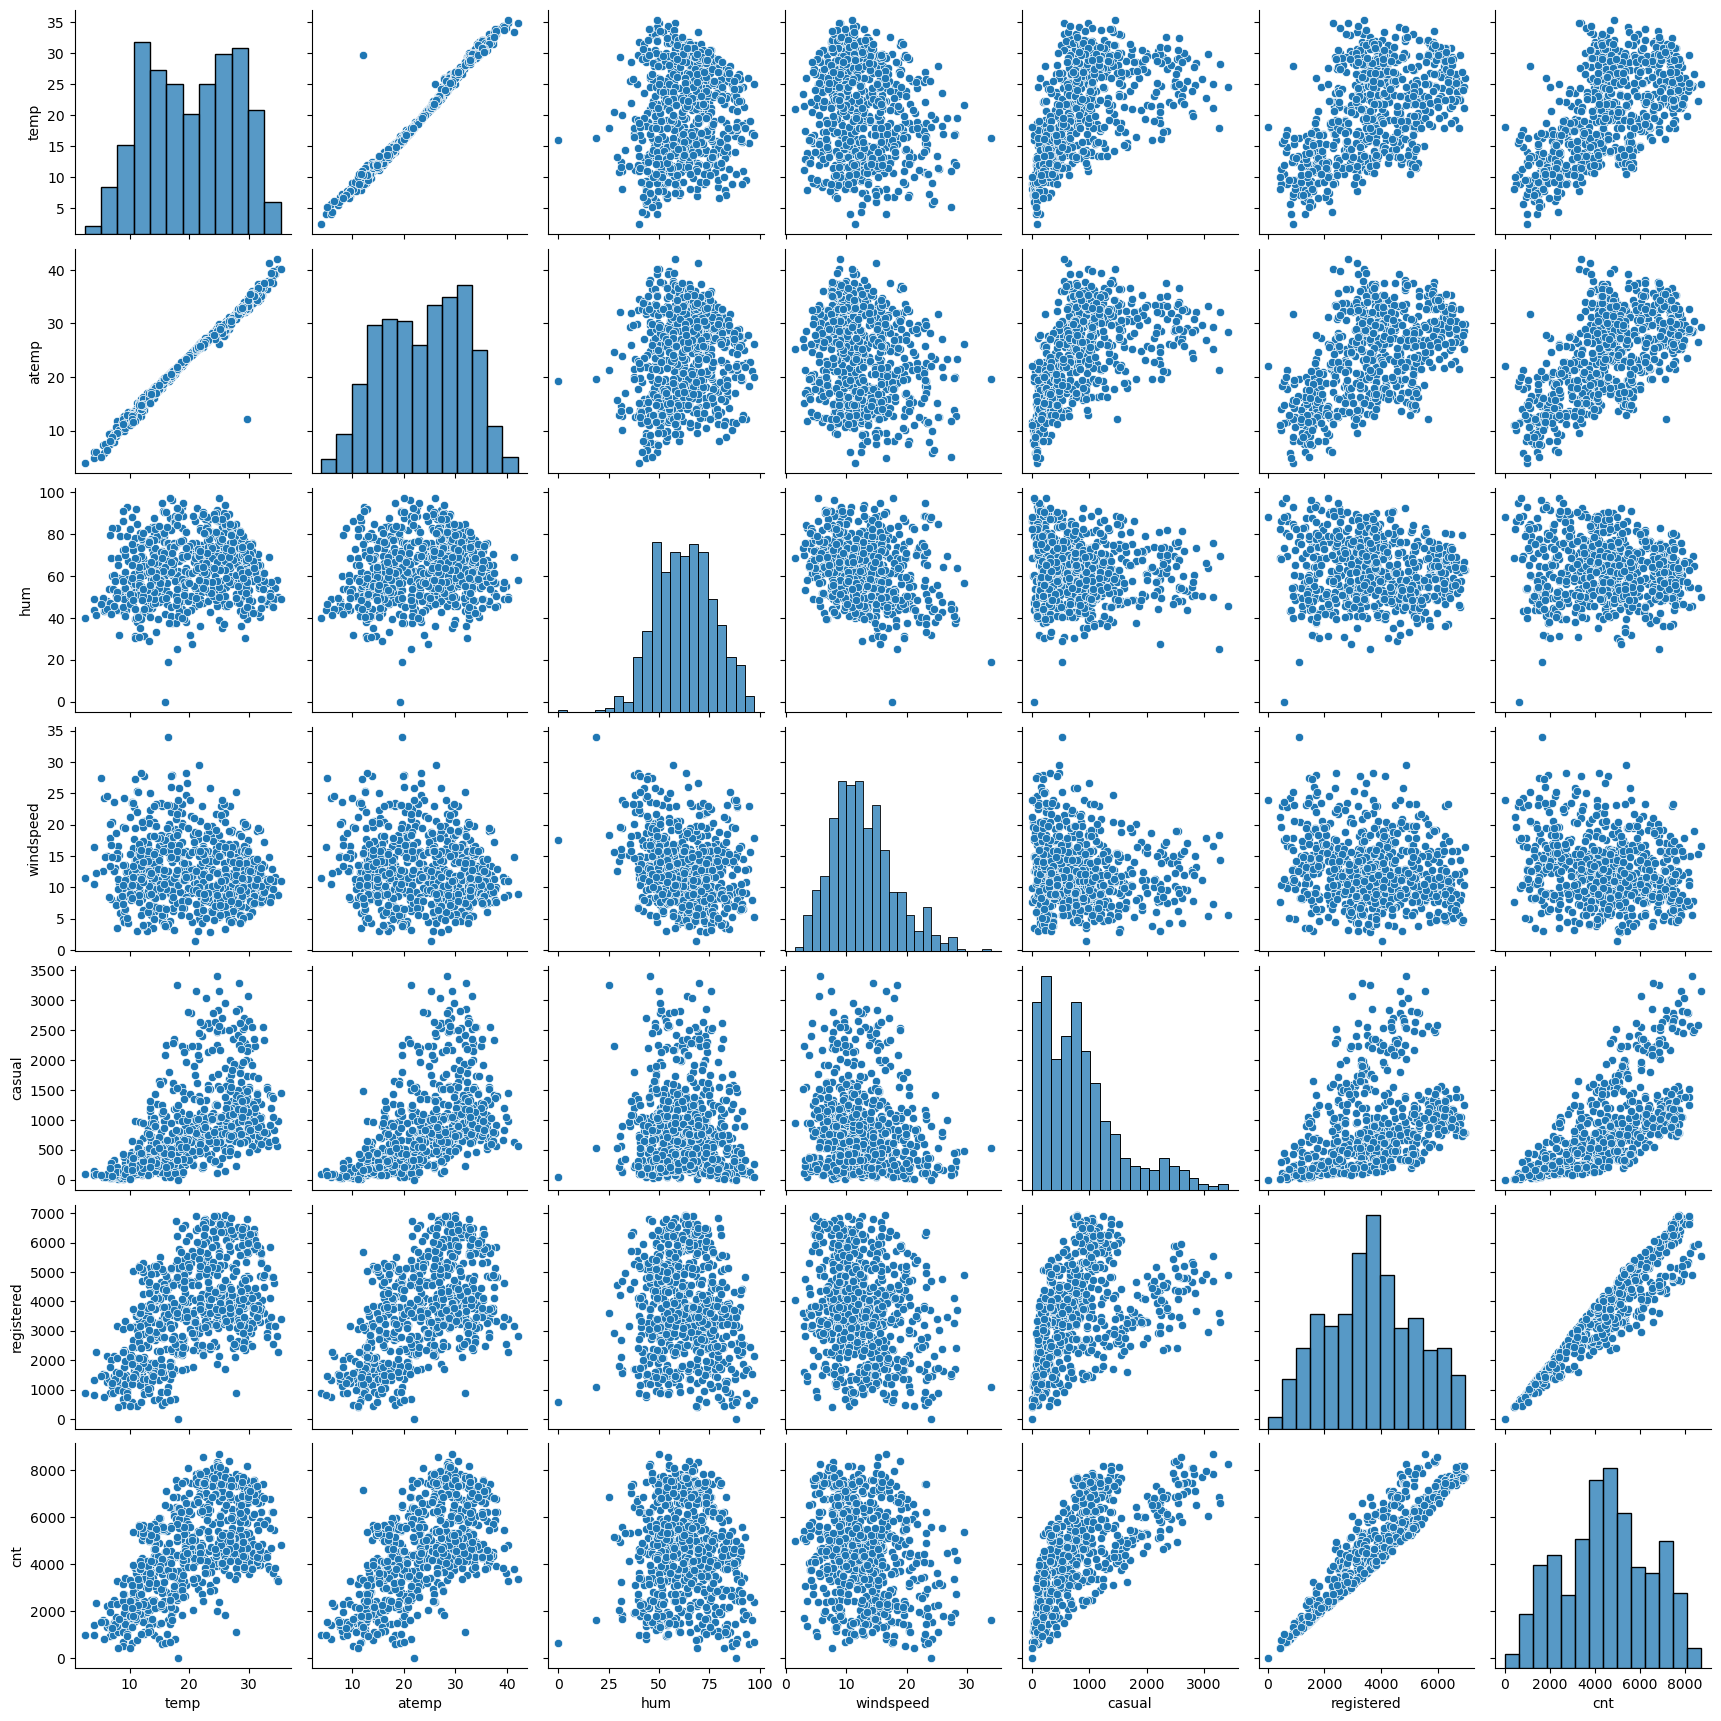

In [32]:
# pair plot to visualise numerical variables
sns.pairplot(bike_numeric_var)

Insights
- target variable cnt is positively correlated with temp, atemp, casual and registered.


<Axes: xlabel='temp', ylabel='atemp'>

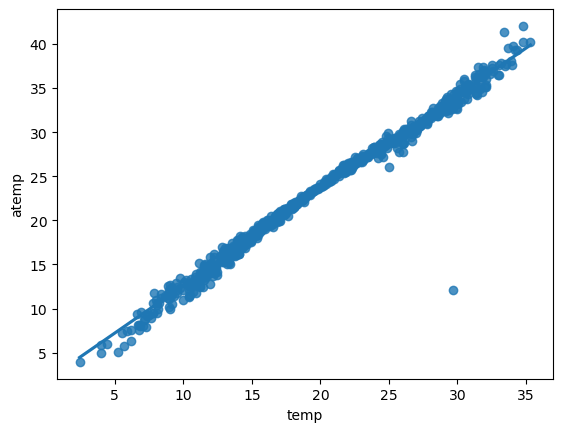

In [33]:
# check the correlation between temp and atemp
sns.regplot(x='temp', y='atemp', data=bike)

In [34]:
# Independent variable atemp is highly positively correlated with temp.
# As it becomes challenging to determine the individual contribution of each predictor variable to target variable, 
# we will drop atemp from the bike dataset.

bike.drop('atemp', axis=1, inplace=True)

In [35]:
# As cnt is sum of casual and registered users, it might not add value to this analysis. We can drop these columns.

bike.drop(['casual', 'registered'], axis=1, inplace=True)

In [36]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,M,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,0,Tue,1,M,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,0,Wed,1,C,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Thur,1,C,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Fri,1,C,9.305237,43.6957,12.522300,1600.0


In [37]:
categorical_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

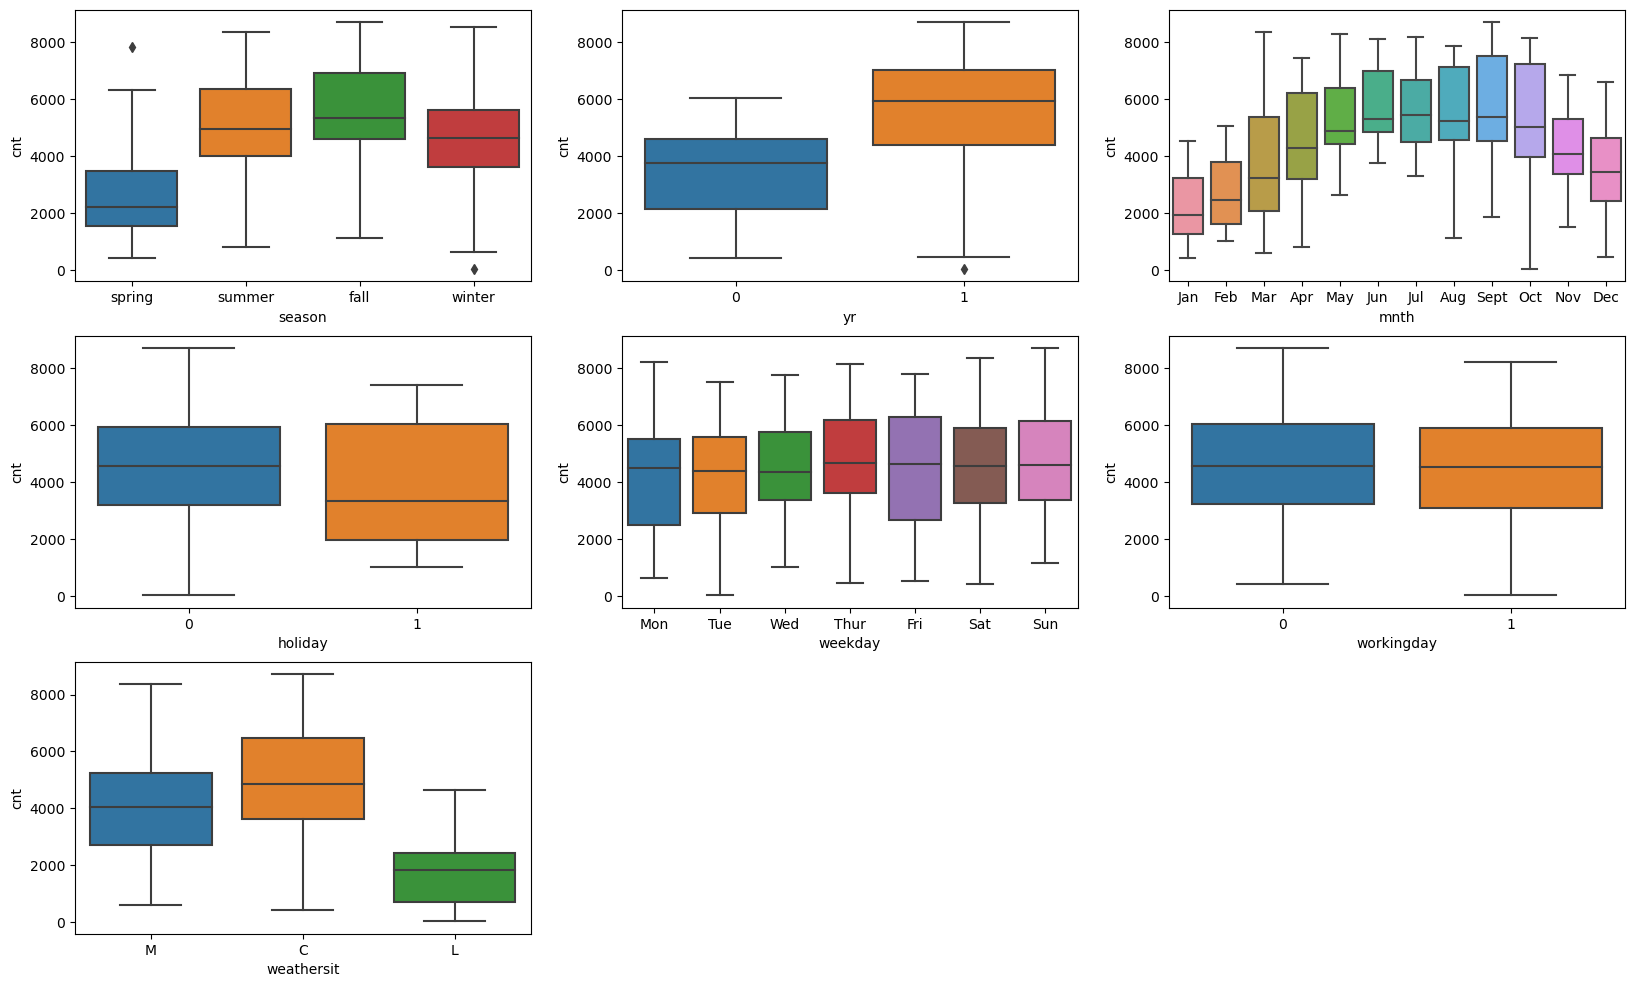

In [38]:
# visualising categorical variables

plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data = bike)
plt.show()

Insights
- fall season seems to have high demand for bikes compared to other seasons
- shared bikes seem doing good in 2019 compared to 2018. This seems gaining popularity with increasing year
- starting and ending of the year, the demand for shared bike seems low compared to mid of the year.
- demand for bikes seems gaining during holiday time
- the median among all the weekdays seems almost at same level

In [39]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,M,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,0,Tue,1,M,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,0,Wed,1,C,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Thur,1,C,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Fri,1,C,9.305237,43.6957,12.522300,1600.0


### Step 5: Data preparation
- convert season, mnth, weekday and weathersit to dummy variables
- scale the numeric variables temp,num, windspeed and cnt using MinMax

In [40]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 62.9+ KB


In [41]:
# change the dataype of int64 to float64

bike[['yr', 'holiday','workingday']] = bike.select_dtypes(include='int64').astype('float64')

In [42]:
# fetch categorical variables

categorical_var = bike.select_dtypes(exclude='float64')
categorical_var.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,M
1,spring,Jan,Tue,M
2,spring,Jan,Wed,C
3,spring,Jan,Thur,C
4,spring,Jan,Fri,C


In [43]:
# convert season, mnth, weekday and weathersit to dummy variables

bike_categorical_variables = pd.get_dummies(categorical_var, dtype=int, drop_first=True)
bike_categorical_variables.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'weathersit_L', 'weathersit_M'],
      dtype='object')

In [44]:
# concatinate dummy variables to orginal bike dataset

bike = pd.concat([bike, bike_categorical_variables],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_L,weathersit_M
0,spring,0.0,Jan,0.0,Mon,1.0,M,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0.0,Jan,0.0,Tue,1.0,M,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0.0,Jan,0.0,Wed,1.0,C,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0.0,Jan,0.0,Thur,1.0,C,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0.0,Jan,0.0,Fri,1.0,C,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# dropseason, mnth, weekday and weathersit as its dummy variables are created

bike.drop(categorical_var.columns, axis=1, inplace=True)

In [46]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_L,weathersit_M
0,0.0,0.0,1.0,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.0,0.0,1.0,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0.0,1.0,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,1.0,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,1.0,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 6: Splitting the data into training and testing sets

In [47]:
# Splitting the data into training and testing Sets

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [48]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_L,weathersit_M
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,7.431626,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 7 : Feature scaling

In [49]:
# create scaler object

scaler = MinMaxScaler()

In [50]:
# Scale the numeric variables excluding dummy varaibles and variables with already 0/1

scale_var = ['temp','hum','windspeed','cnt']
bike_train[scale_var] = scaler.fit_transform(bike_train[scale_var])

Dividing into X and Y sets for the model building

In [51]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [52]:
type(y_train)

pandas.core.series.Series

In [53]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_L,weathersit_M
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1.0,0.0,1.0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0.0,0.0,0.0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### Step 8: Model building

In [54]:
# running RFE with 10 features
# creating linear regression object

lm = LinearRegression()

# fit with 10 features

rfe = RFE(lm, n_features_to_select = 10)  
rfe = rfe.fit(X_train, y_train)

In [55]:
type(X_train.columns), type(rfe.support_), type(rfe.ranking_)

(pandas.core.indexes.base.Index, numpy.ndarray, numpy.ndarray)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 13),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 17),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 12),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 10),
 ('weekday_Thur', False, 18),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 15),
 ('weathersit_L', True, 1),
 ('weathersit_M', False, 3)]

In [57]:
# features selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sept', 'weathersit_L'],
      dtype='object')

In [58]:
# features eliminated by RFE

X_train.columns[~rfe.support_]

Index(['workingday', 'season_spring', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_M'],
      dtype='object')

In [59]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

#### Model 1 using statsmodel.

In [60]:
# Adding a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [61]:
# Summary of linear model1
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.79e-186
Time:                        11:58:20   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2682      0.026     10.292      0.000       0.217       0.319
yr                0.2259      0.008     27.118      0.000       0.210       0.242
holiday          -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp              0.6200      0.023     27.492      0.000       0.576       0.664
hum              -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed        -0.2059      0.026     -7.889      0.000      -0.257      -0.155
season_summer     0.0800      0.011      7.281      0.000       0.058       0.102
season_winter     0.1390      0.011     12.903      0.000       0.118       0.160
mnth_Jul         -0.0482      0.018     -2.606      0.009      -0.085      -0.012
mnth_Sept         0.0944      0.016      5.724      0.000       0.062       0.127
weathersit_L     -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF of selected features

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.19
3,temp,1.53
8,mnth_Jul,1.43
6,season_summer,1.33
7,season_winter,1.28
4,hum,1.26
9,mnth_Sept,1.19
5,windspeed,1.16
10,weathersit_L,1.11
1,yr,1.03


#### Model2

In [63]:
# dropping one more variable to verify if it changes the model statistics

X_train_new = X_train_rfe.drop(["season_summer"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.9
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          1.39e-176
Time:                        11:58:20   Log-Likelihood:                 468.44
No. Observations:                 510   AIC:                            -916.9
Df Residuals:                     500   BIC:                            -874.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2679      0.027      9.785      0.000       0.214       0.322
yr                0.2253      0.009     25.748      0.000       0.208       0.243
holiday          -0.1008      0.028     -3.658      0.000      -0.155      -0.047
temp              0.6574      0.023     28.493      0.000       0.612       0.703
hum              -0.2753      0.033     -8.274      0.000      -0.341      -0.210
windspeed        -0.1892      0.027     -6.925      0.000      -0.243      -0.135
season_winter     0.1127      0.011     10.570      0.000       0.092       0.134
mnth_Jul         -0.0915      0.018     -4.969      0.000      -0.128      -0.055
mnth_Sept         0.0627      0.017      3.750      0.000       0.030       0.095
weathersit_L     -0.1941      0.027     -7.210      0.000      -0.247      -0.141
==============================================================================
Omnibus:                       30.742   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.504
Skew:                          -0.441   Prob(JB):                     2.93e-11
Kurtosis:                       4.226   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.19
3,temp,1.45
7,mnth_Jul,1.28
4,hum,1.26
5,windspeed,1.15
6,season_winter,1.13
8,mnth_Sept,1.11
9,weathersit_L,1.11
1,yr,1.03
2,holiday,1.01


#### Inferences from model2
- The p-value of all the coefficients of 9 predictors are zero which means they are statistically significant, the association is not purely by chance.
- R squared is 0.814, which implies that 81.4% of the variance in cnt is explained by the above 9 independent variables.
- Adjusted R squared of 0.811 is also fairly decent.
- F statistic has a very low p value, which explains overall the model is significant.
- VIF of all the 9 independent varaibles are almost 1 or 2 which is <5. This explains the correlation among these independent variables is minimal.

### Step 9: Residual analysis of the train data

In [65]:
y_train_pred = lm2.predict(X_train_new)

In [66]:
type(y_train_pred)

pandas.core.series.Series

In [67]:
type(y_train)

pandas.core.series.Series

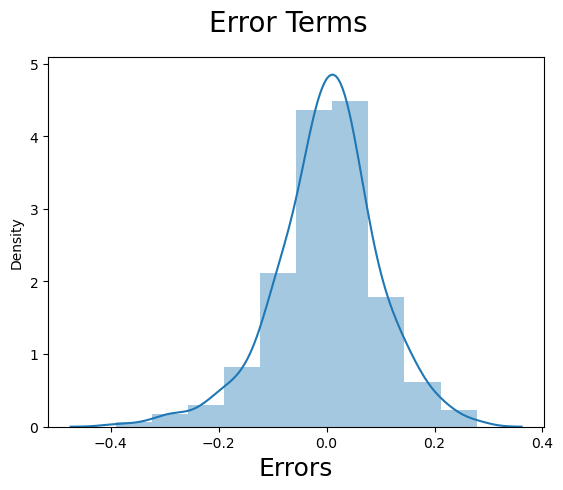

In [68]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

#### Inference
- The residuals are following the normally distributed with a mean 0, which is one of the major assumptions of linear regression.

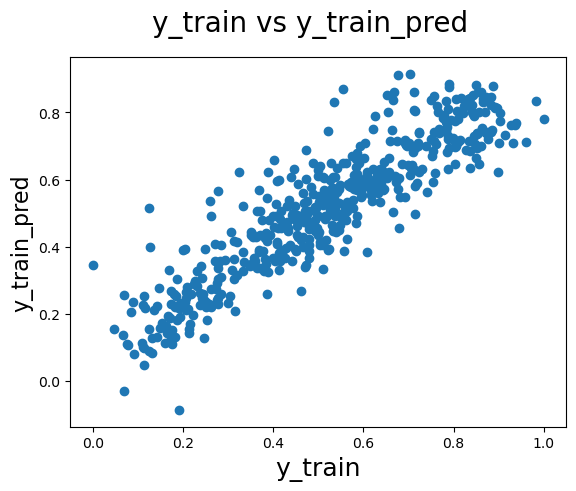

In [69]:
# Plotting y_train and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
plt.show()

In [70]:
# pearson correlation coefficient between y_train and y_train_pred
corr, p = pearsonr(y_train,y_train_pred)
print(corr)

0.9024712294185135


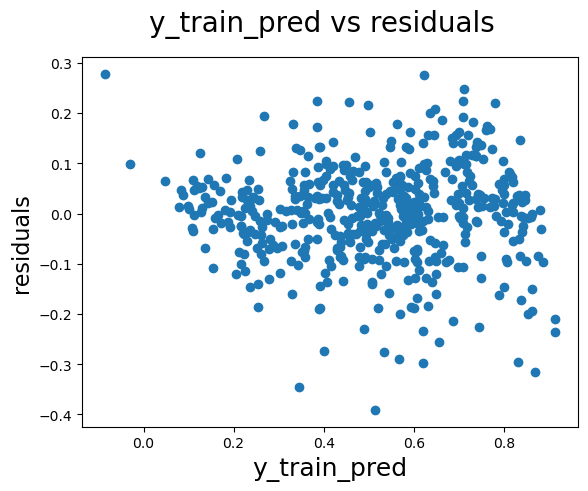

In [71]:
# Plotting y_train and residuals 

fig = plt.figure()
plt.scatter(y_train_pred, (y_train - y_train_pred))
fig.suptitle('y_train_pred vs residuals', fontsize=20)
plt.xlabel('y_train_pred', fontsize=18)
plt.ylabel('residuals', fontsize=16)
plt.show()

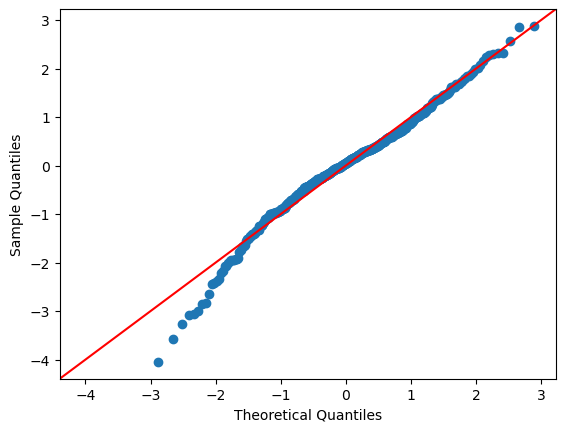

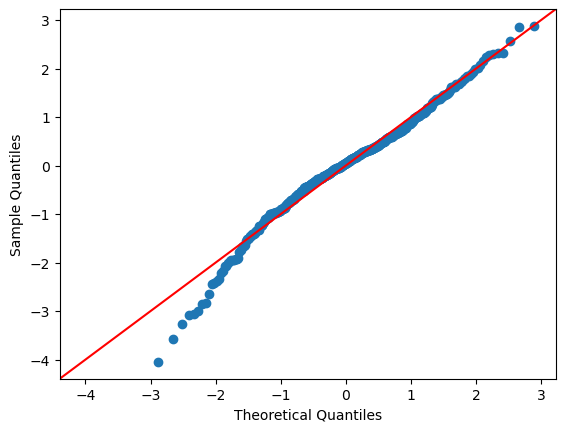

In [92]:
# sns.residplot(y_train_pred, (y_train - y_train_pred))
# plt.r(y_train_pred, (y_train - y_train_pred))

from statsmodels.api import qqplot

qqplot(data=(y_train - y_train_pred), fit=True, line='45')

#### In the above plot, we noticed that the scores are randomly scattered about a horizontal line.  homoscedasticity is met i.e. the error is constant across the values of the dependent variable.

#### By the above inferences, we have a decent model. Now let's make predictions on the final model2

### Step 10: Predictions and evaluation on test set using the final model

#### Applying scaling on test set

In [72]:
bike_test[scale_var] = scaler.transform(bike_test[scale_var])

In [73]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_L,weathersit_M
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [74]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [75]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_L,weathersit_M
184,0.0,1.0,0.0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,0.0,1.0,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0.0,0.0,0.0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0.0,0.0,1.0,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0.0,0.0,0.0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
# drop const from train set

X_train_new.drop('const', axis=1, inplace=True)

In [77]:
# Retaining the variables in X_test with that of variables from final model train dataset and dropping the rest of the variables.

X_test_new = X_test[X_train_new.columns]

In [78]:
# Adding constant variable to test dataframe

X_test_new = sm.add_constant(X_test_new)

In [79]:
# Making predictions using the fourth model

y_test_pred = lm2.predict(X_test_new)

##### Calculating r2 score of train and test sets.

In [80]:
# r2 score of test set
r2_score(y_test, y_test_pred)

0.7883704476382328

In [81]:
# r2 score of train set
r2_score(y_train, y_train_pred)

0.8144543199281633

The difference of r2 scores of test and train sets is minimal, which indicates the model we derive is a decent one.

##### Calculating RMSE

In [82]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.10059281569110766

In [83]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.09657449386043891

RMSE is relatively low indicates that the model we derived is a decent one.

Text(0, 0.5, 'y_pred')

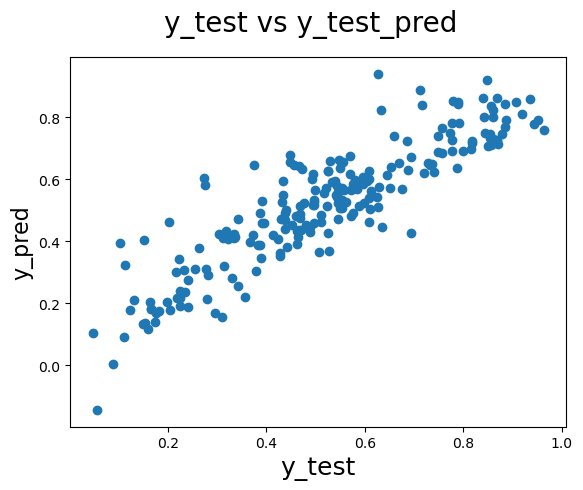

In [84]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [85]:
# pearson correlation coefficient between y_test and y_test_pred
corr, p = pearsonr(y_test,y_test_pred)
print(corr)

0.8881192405326646


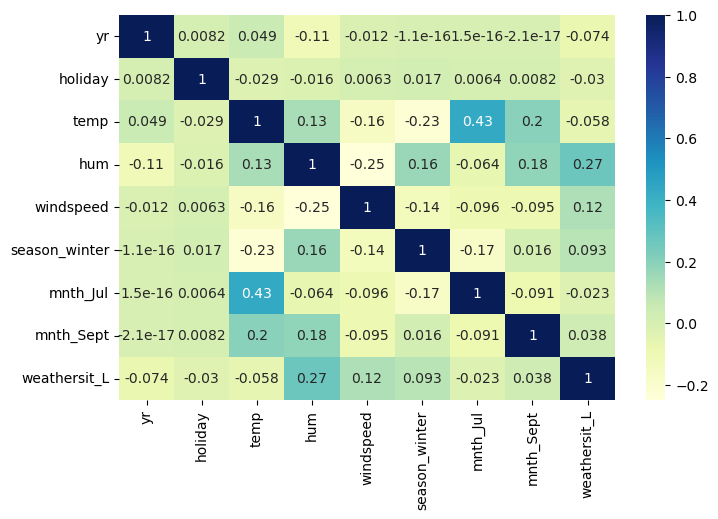

In [86]:
# Correlation between final predictors
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike[X_train_new.columns].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the decent model that we could build. The final predictors seems to have fairly low correlations.

The equation of our best fitted line is:

$ cnt = 0.2679 + 0.2253  \times  yr - 0.1008  \times  holiday + 0.6574 \times temp - 0.2753 \times hum - 0.1892 \times windspeed + 0.1127 \times season_winter - 0.0915 \times mnth_Jul + 0.0627 \times mnth_Sept - 0.1941 \times weathersit_L $

#### Inferences

We have seen that
- Independent and dependent variables are linear.
- The residual error plot is normally distributed with mean 0.
- Target variable is independent of errors.
- r squared of test set varies with minor difference from train set.
- VIF of all the predictors are <2, which gives good indication that predictors are not correlated to each other.
- p-value of all the coefficients and F-statistics are alomst 0

From the above observations, we can consider that the second model we built is a decent model.